bjective: The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

Dataset Use the Iris dataset available in the sklearn library.

Loading and Preprocessing Load the Iris dataset from sklearn. Drop the species column since this is a clustering problem.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Drop the target (species) column
# In the load_iris() function, target labels are separate from the data
# So there is no need to drop them from iris_df

print(iris_df.head())  # Optional: To see the first few rows of the dataset

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


C:\Users\91989\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91989\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91989\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


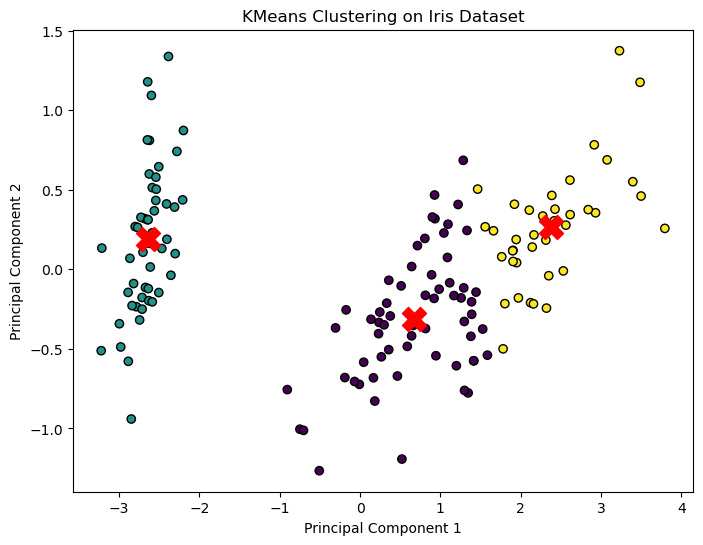

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Create KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(iris_df)

# Get cluster labels (i.e., which cluster each point belongs to)
clusters = kmeans.labels_
# Add the cluster labels to the DataFrame
iris_df['Cluster'] = clusters
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df.drop('Cluster', axis=1))

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')

# Add cluster centers
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=300, marker='X')

plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
